<a href="https://colab.research.google.com/github/igors96/Decision_Trees_Iris/blob/main/decision_trees_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
x = pd.DataFrame(iris.data, columns = [iris.feature_names])
y = pd.Series(iris.target)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skfold = StratifiedKFold(n_splits = 5)

modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo,x,y,cv = skfold)

print(resultado.mean())

0.9600000000000002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [4]:
import graphviz
from sklearn.tree import export_graphviz

In [5]:
modelo.fit(x,y)

export_graphviz(modelo, out_file = 'exemplo.dot', feature_names = iris.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [6]:
!dot -Tpng exemplo.dot -o exemplo.png -Gdpi=600

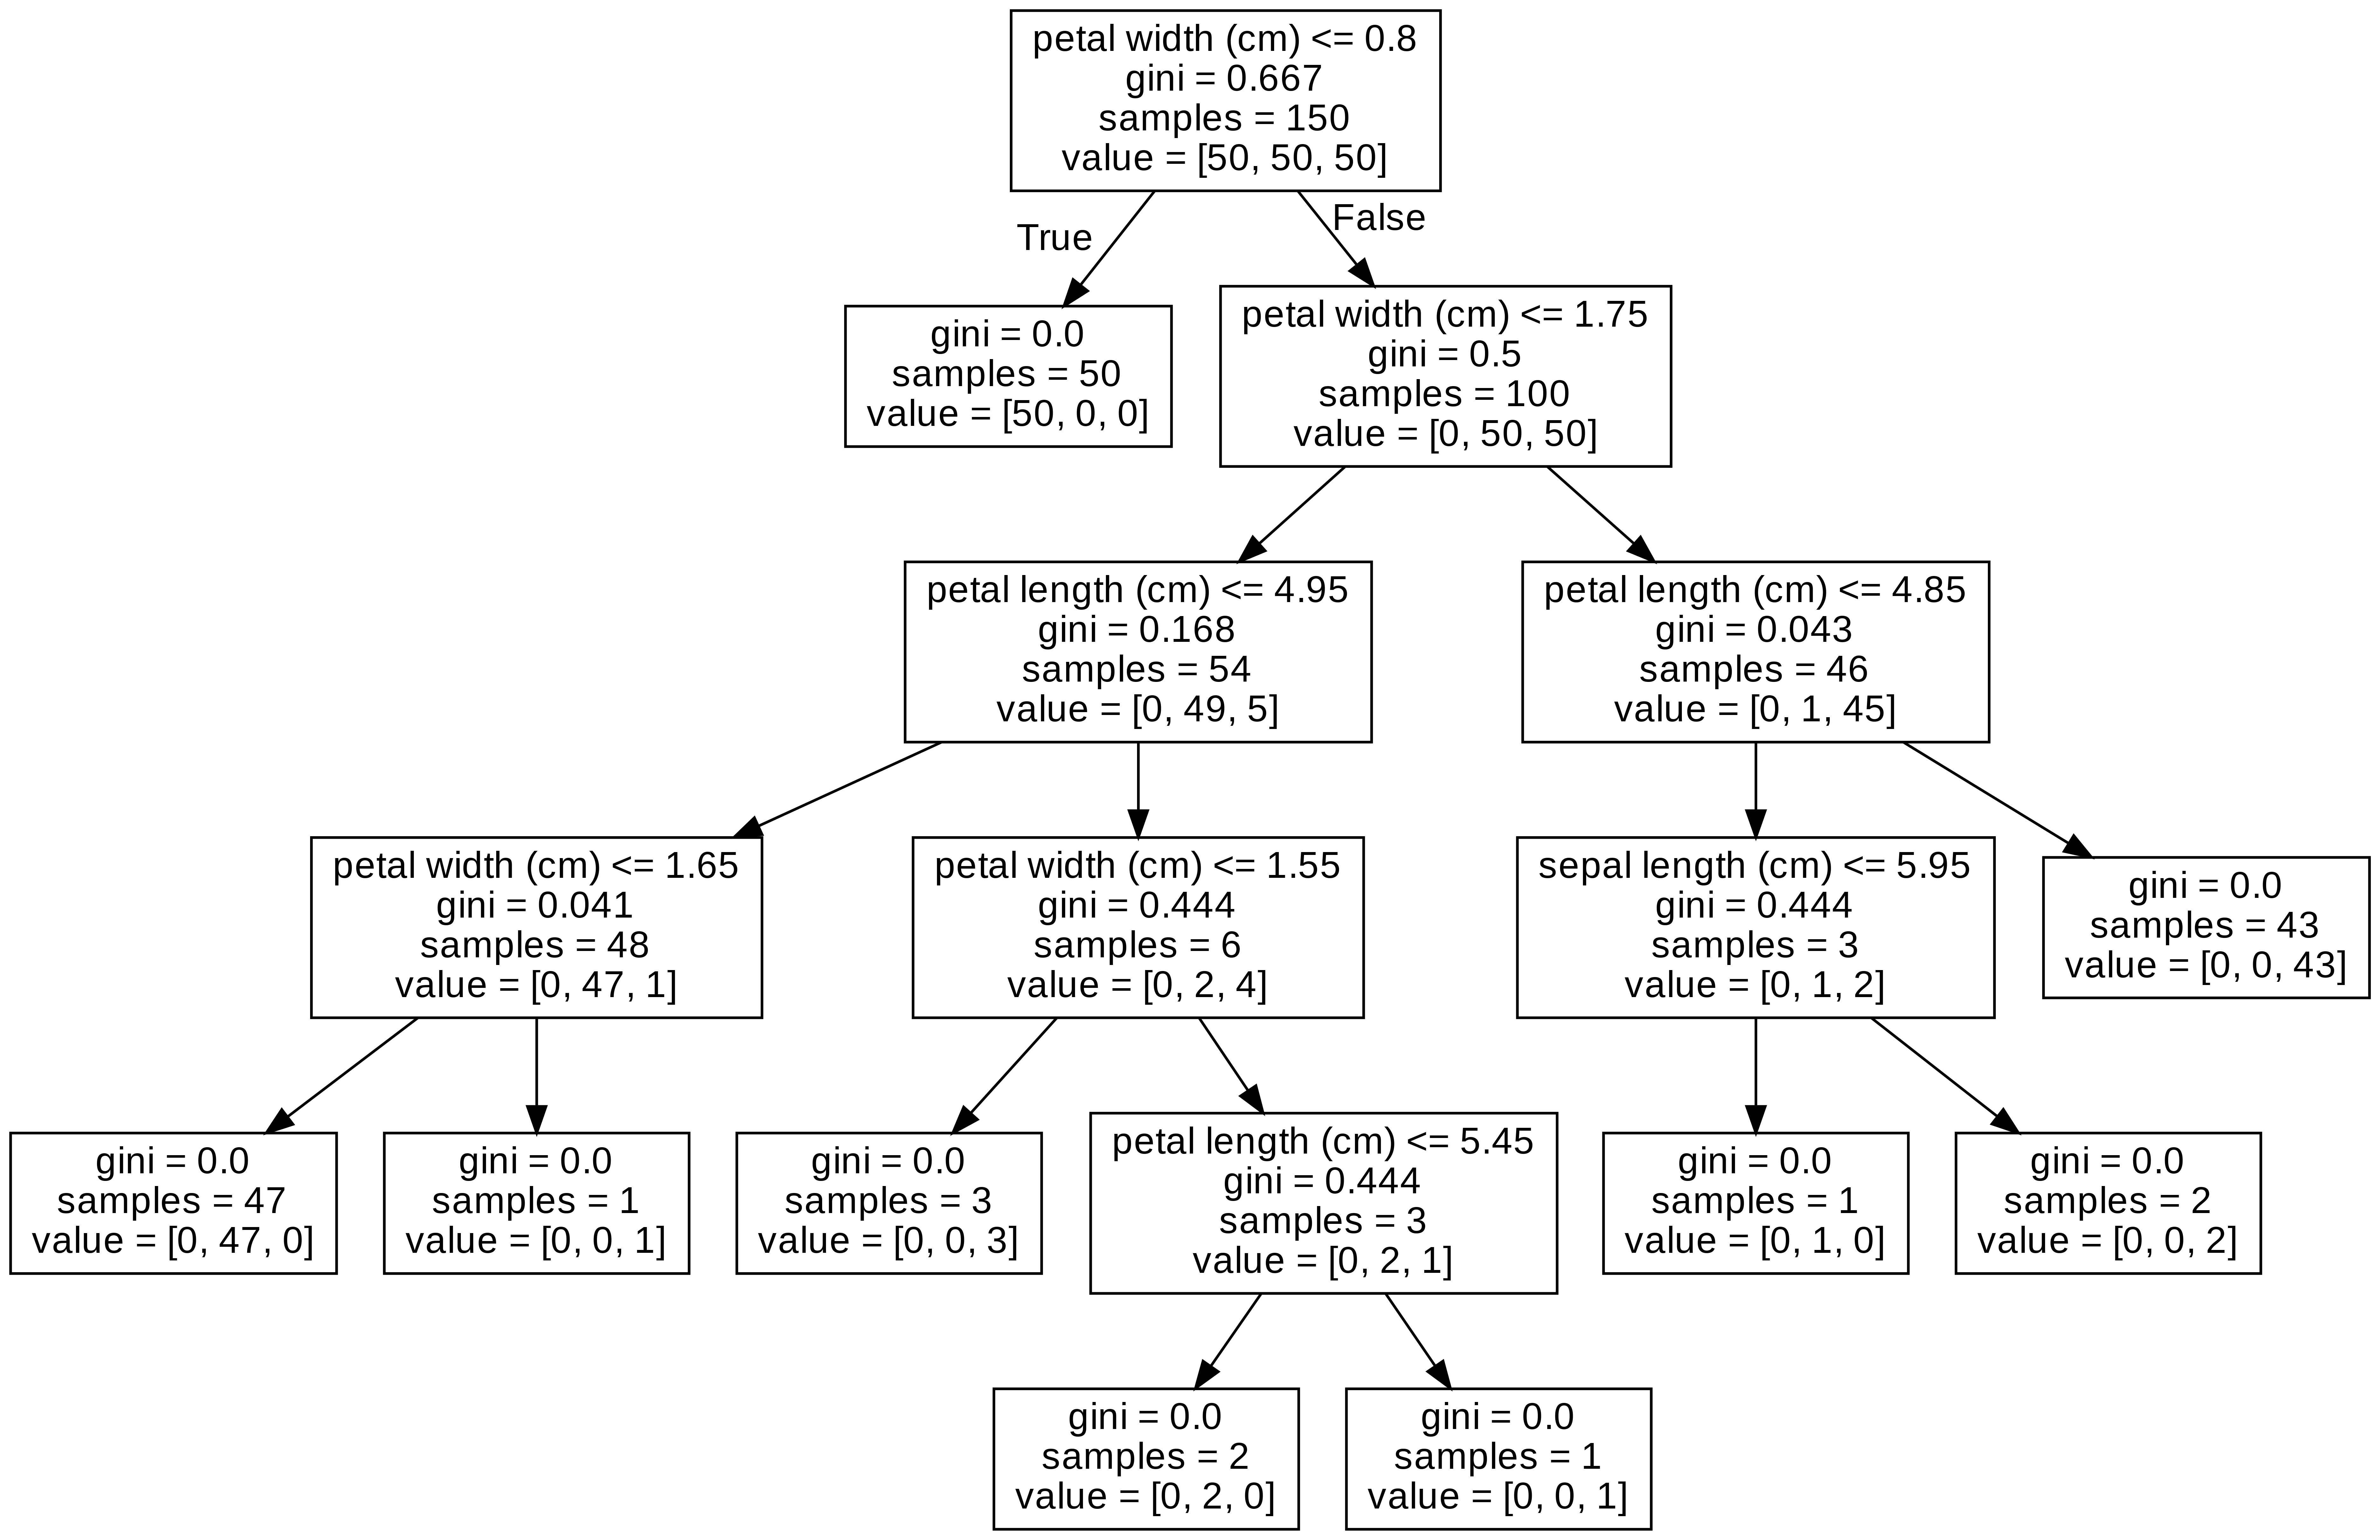

In [7]:
from IPython.display import Image
Image(filename = 'exemplo.png')

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV

minimos_split = np.array([2,3,4,5,6,7,8])
maximo_nivel = np.array([3,4,5,6])
algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split': minimos_split, 'max_depth': maximo_nivel, 'criterion': algoritmo}

modelo1 = DecisionTreeClassifier()

gridDecisionTree = GridSearchCV(estimator = modelo1, param_grid = valores_grid, cv = 5)
gridDecisionTree.fit(x,y)

print('Mínimo split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Máxima profundidade: ', gridDecisionTree.best_estimator_.max_depth)
print('Algoritmo escolhido: ', gridDecisionTree.best_estimator_.criterion)
print('Acurácia: ', gridDecisionTree.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Mínimo split:  3
Máxima profundidade:  3
Algoritmo escolhido:  gini
Acurácia:  0.9733333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


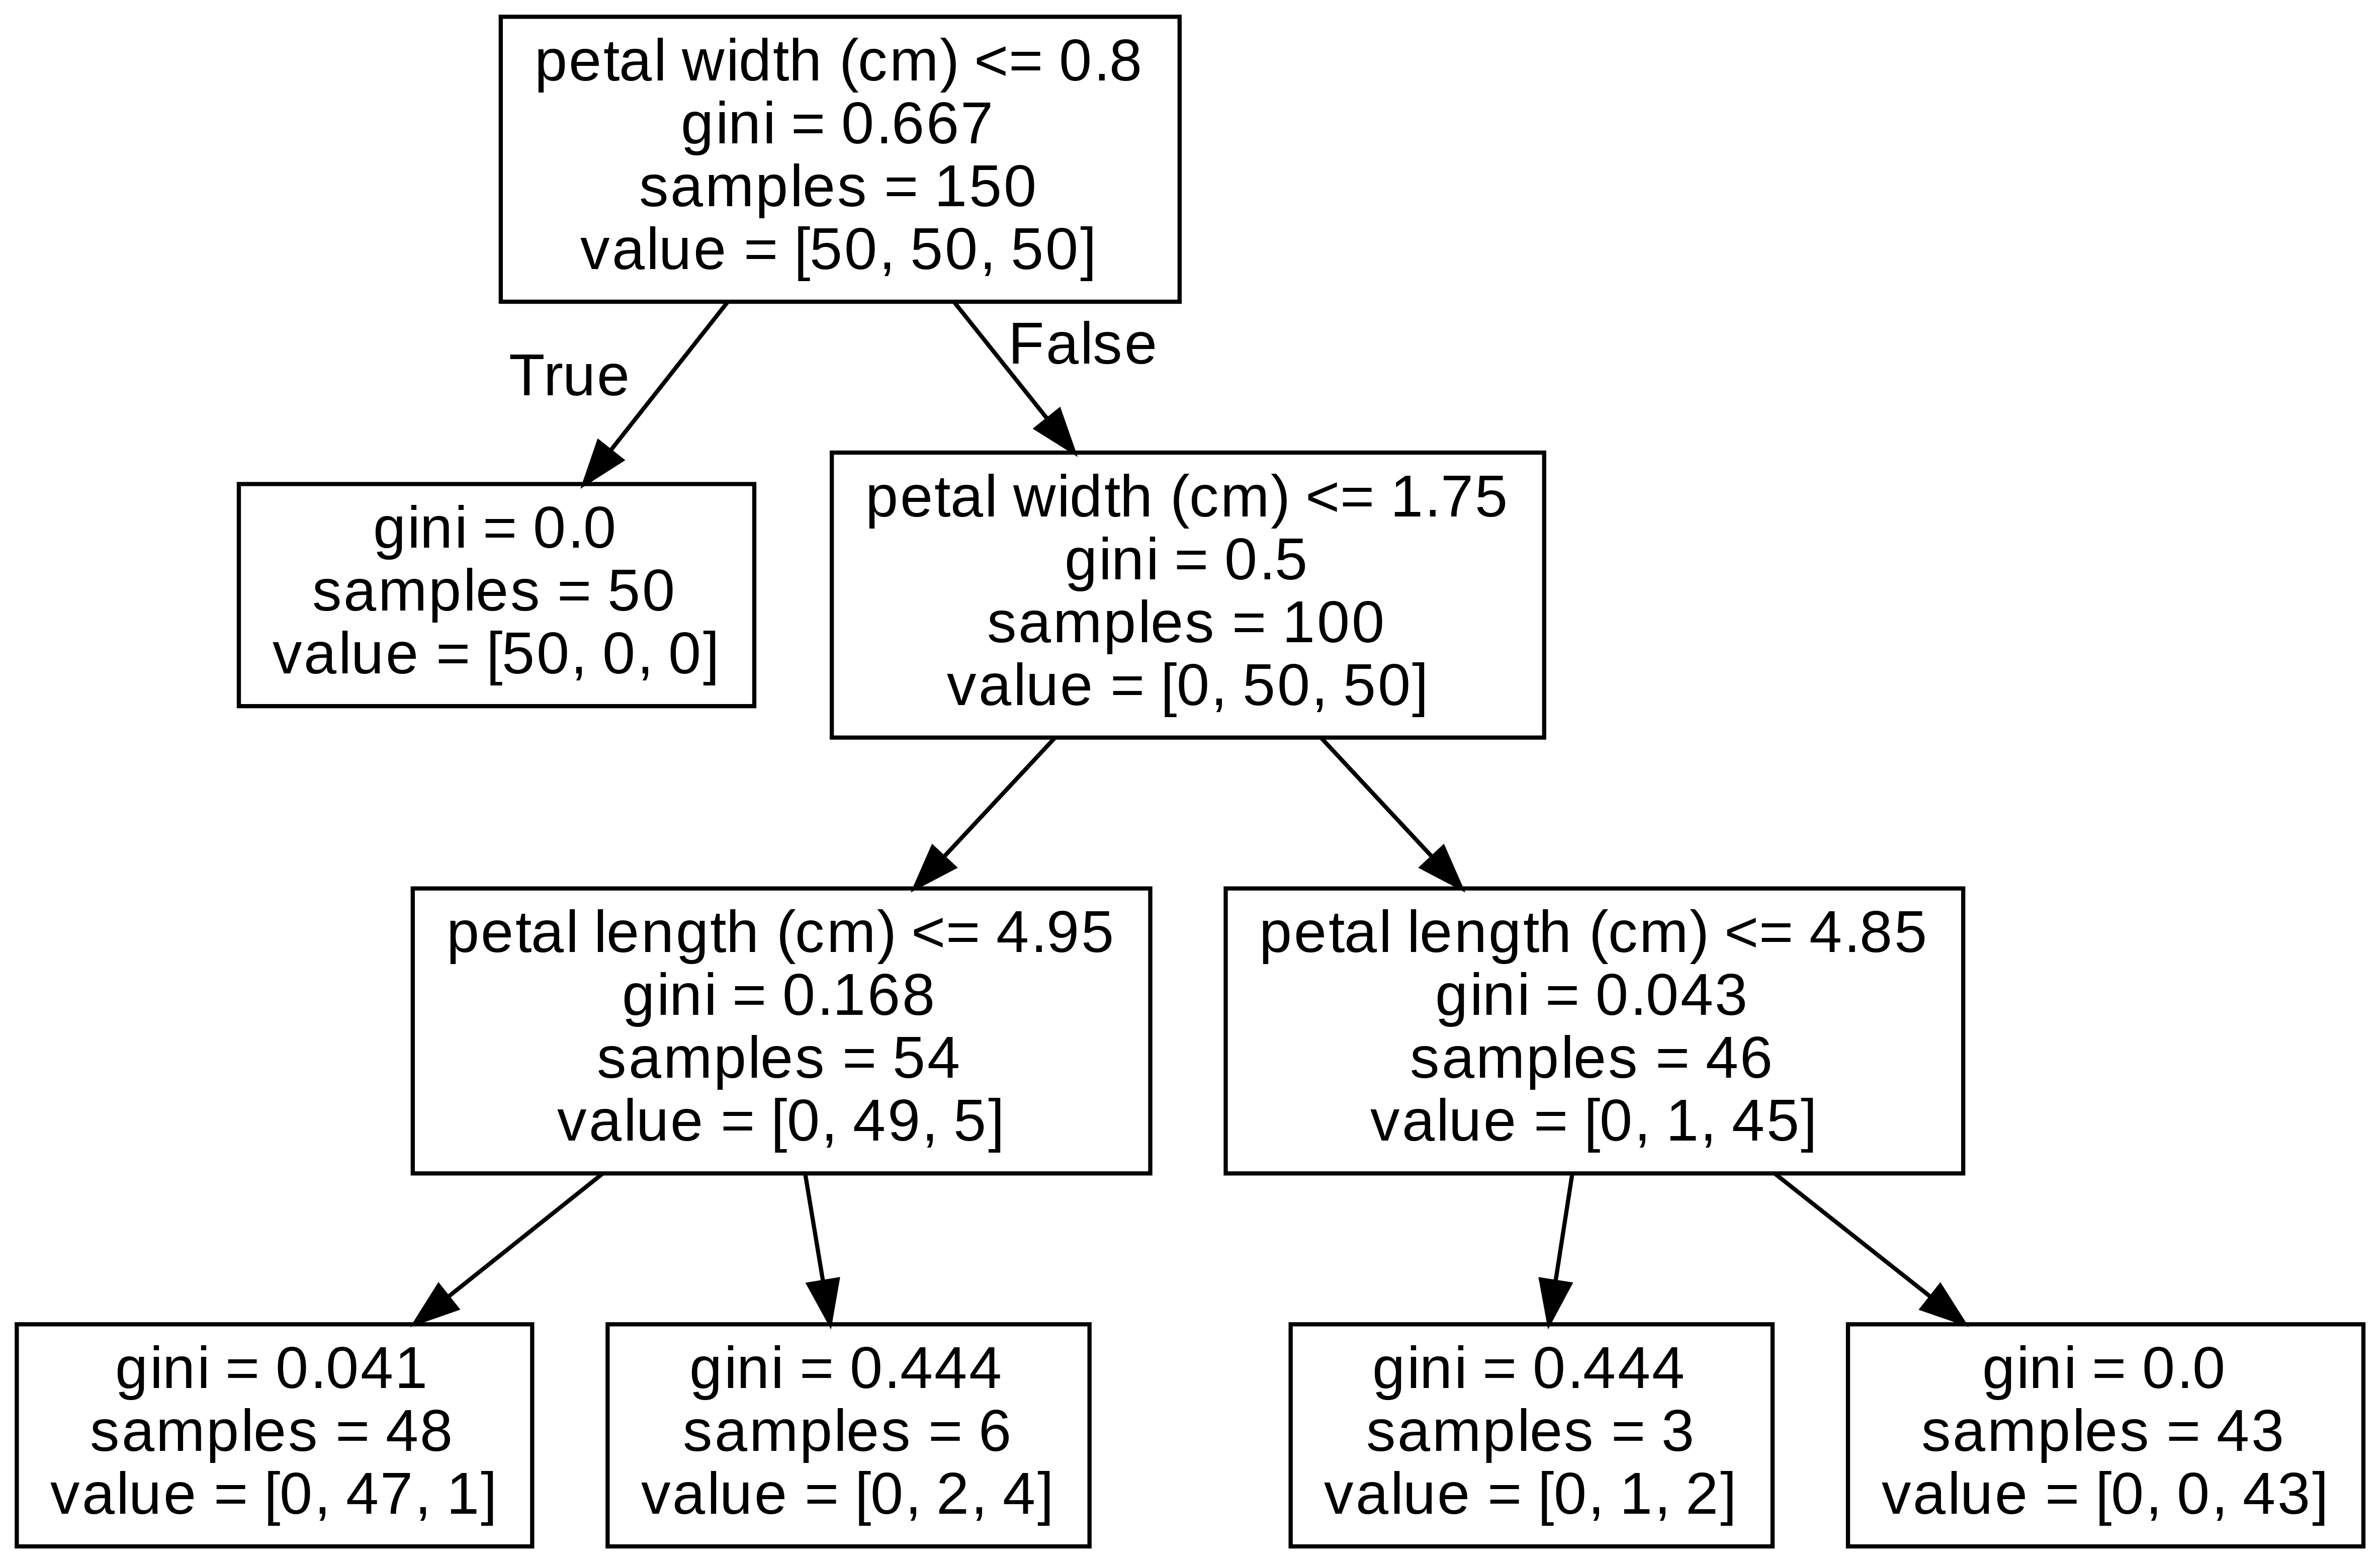

In [9]:
melhor_modelo = DecisionTreeClassifier(min_samples_split = 2, max_depth = 3, criterion = 'gini')
melhor_modelo.fit(x,y)
export_graphviz(melhor_modelo, out_file = 'exemplo1.dot', feature_names = iris.feature_names)
!dot -Tpng exemplo1.dot -o exemplo1.png -Gdpi=600
from IPython.display import Image
Image(filename = 'exemplo1.png')